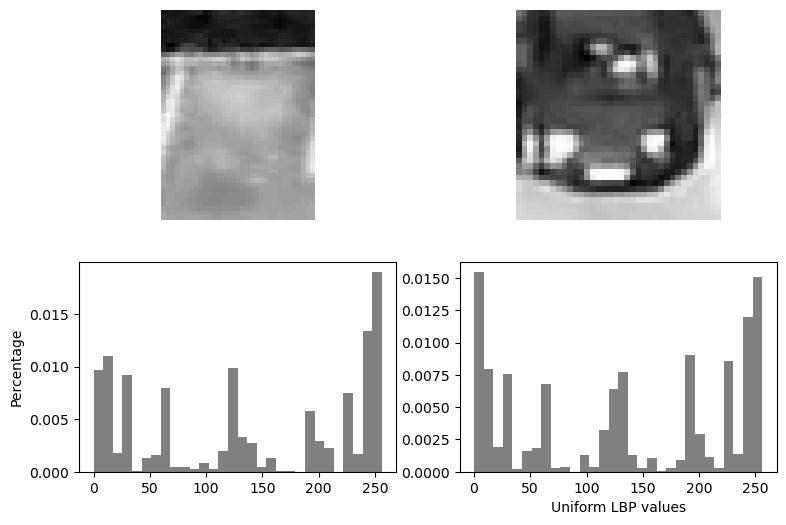

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage import io

# settings for LBP
radius = 1
n_points = 8 * radius

# Função para exibir o histograma de LBP
def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(
        lbp.ravel(), density=True, bins=30, range=(0, n_bins), facecolor='0.5'
    )

# Carregar as imagens empty e occupied
empty = io.imread('PKLot/PKLot/PUCPR/Sunny/2012-09-11/empty/2012-09-11_15_16_58_space_10.png', as_gray=True)
occupied = io.imread('PKLot/PKLot/PUCPR/Sunny/2012-09-11/occupied/2012-09-11_15_16_58_space_18.png', as_gray=True)

# Converter as imagens para o tipo uint8 (0-255)
empty = (empty * 255).astype(np.uint8)
occupied = (occupied * 255).astype(np.uint8)

# Criando o LBP para as imagens
lbp_empty = local_binary_pattern(empty, n_points, radius)
lbp_occupied = local_binary_pattern(occupied, n_points, radius)

# Plotando as imagens e seus histogramas de LBP
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
plt.gray()

# Exibindo as imagens originais e os histogramas
ax1.imshow(empty)
ax1.axis('off')
hist(ax3, lbp_empty)
ax3.set_ylabel('Percentage')

ax2.imshow(occupied)
ax2.axis('off')
hist(ax4, lbp_occupied)
ax4.set_xlabel('Uniform LBP values')

plt.show()


In [2]:
import os
import numpy as np
import pandas as pd
from skimage import io
from skimage.feature import local_binary_pattern

n_points = 8 
radius = 1 


def calcular_lbp_histograma_e_classe(imagem, classe):
    lbp = local_binary_pattern(imagem, n_points, radius)
    histograma, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    histograma = histograma.astype('float')
    histograma /= (histograma.sum() + 1e-6)  
    histograma = np.append(histograma, classe)
    return histograma

In [12]:
def processar_imagens_e_salvar_csv(pasta_principal):
    linhas = []
    imagens_processadas = 0

    nome_csv = f"histogramas_lbp_{os.path.basename(pasta_principal)}.csv"

    for raiz, dirs, arquivos in os.walk(pasta_principal):
        for nome_arquivo in arquivos:
            if nome_arquivo.endswith('.jpg'):
                if 'Empty' in raiz:
                    classe = 0
                elif 'Occupied' in raiz:
                    classe = 1
                else:
                    continue

                caminho_imagem = os.path.join(raiz, nome_arquivo)
                imagem = io.imread(caminho_imagem, as_gray=True)

                if imagem is None or imagem.size == 0:
                    print(f"Erro ao carregar a imagem {caminho_imagem}")
                    continue

                imagem = (imagem * 255).astype(np.uint8)
                histograma = calcular_lbp_histograma_e_classe(imagem, classe=classe)
                linha_com_nome = [nome_arquivo] + histograma.tolist()
                linhas.append(linha_com_nome)
                imagens_processadas += 1

    if imagens_processadas == 0:
        print("Nenhuma imagem foi processada. Verifique o caminho ou as permissões.")
    else:
        df = pd.DataFrame(linhas)
        df.to_csv(nome_csv, header=False, index=False, sep=';')
        print(f"Arquivo CSV gerado com sucesso como '{nome_csv}'! Total de imagens processadas: {imagens_processadas}")

In [ ]:
pasta = r'PKLot\PKLotSegmented\PUC\Cloudy'
processar_imagens_e_salvar_csv(pasta)

In [14]:
pasta= r'PKLot\PKLotSegmented\PUC\Rainy'
processar_imagens_e_salvar_csv(pasta)

Arquivo CSV gerado com sucesso como 'histogramas_lbp_Rainy.csv'! Total de imagens processadas: 83056


In [ ]:
pasta= r'PKLot\PKLotSegmented\PUC\Sunny'
processar_imagens_e_salvar_csv(pasta)